10000 tmax: 100
fn: <function lorenz at 0x7ff8066ffd30> ,args: (10, 2.667, 28) ,init: (0, 1, 1.05) ,t0: 0 ,tmax: 100
sigmabetarho: (10, 2.667, 28)
[ 0.          0.09511585  0.18268459 ... 12.62716948 12.01145468
 11.33939764] [1.         1.00303828 1.03049742 ... 6.81464944 5.54738806 4.39237499] [ 1.05        1.02284283  0.99732053 ... 37.90448769 37.658189
 37.23893917]


/tmp/ipykernel_1599/1252088662.py:44: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


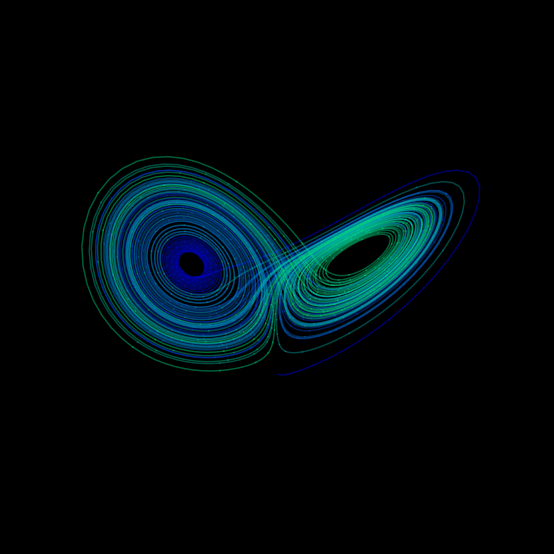

In [36]:
# https://scipython.com/blog/the-lorenz-attractor/

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create an image of the Lorenz attractor.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-lorenz-attractor/
# Christian Hill, January 2016.
# Updated, January 2021 to use scipy.integrate.solve_ivp.

WIDTH, HEIGHT, DPI = 1000, 750, 100

# Lorenz paramters and initial conditions.
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points.
tmax, n = 100, 10000

def lorenz(t, X, sigma, beta, rho):
    """The Lorenz ODEs."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Integrate the Lorenz ODEs.
soln = solve_ivp(lorenz, (0, tmax), (u0, v0, w0), args=(sigma, beta, rho),
                 dense_output=True)
# Interpolate solution onto the time grid, t.
t = np.linspace(0, tmax, n)
x, y, z = soln.sol(t)
print(n, 'tmax:', tmax)
print('fn:', lorenz, ',args:',(sigma, beta, rho), ',init:',(u0, v0, w0), ',t0:',0, ',tmax:',tmax) 
print('sigmabetarho:', (sigma, beta, rho))
print(x,y,z)

# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = fig.gca(projection='3d')
ax.set_facecolor('k')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
cmap = plt.cm.winter
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.savefig('lorenz.png', dpi=DPI)
plt.show()

In [47]:
'''
The Lorenz attractor,as described in Lorenz's paper of 1963[15] is \
given by the following 3-dimensional system of ordinary differential \
ODEs:
    dx/dt=10(y-x)
    dy/dt=-xz+28r-y
    dz/dt=xy+-(8/3).z
For those parameters (10,28 and 8/3) the system trajectories produce \
a strange attractor.
'''

import numpy as np
from scipy.integrate import solve_ivp

def getTs(ODE: dict, T: int, tsParams: dict):
    
    dt = tsParams.get('dt', 0.001)  # timeserie timestep
    noise = tsParams.get('noise',0) # noise
    
    ODE_fn = ODE.get('fn')
    ODE_args = ODE.get('args')
    ODE_initialConditions = ODE.get('X0') or (0,0,0)
    Din = len(ODE_initialConditions)
    
    t0=0
    tmax = T * dt

    # Integrate the Lorenz ODEs.
    soln = solve_ivp(ODE_fn, (t0, tmax), ODE_initialConditions, args=ODE_args,
                    dense_output=True)
    
    # Interpolate solution onto the time grid, t.
    t = np.linspace(0, tmax, T)
    x, y, z = soln.sol(t)
    return (x,y,z)

In [5]:
ODE = {
    'blob':'lalala'
}

ODE_initialConditions = ODE.get('X0') or (0,0,0)
len(ODE_initialConditions)

3

In [54]:
def lorenzODE(t, X, sigma, rho, beta):
    """The Lorenz ODEs."""
    x,y,z= X
    xp = -sigma*(x - y)
    yp = rho*x - y - x*z
    zp = -beta*z + x*y
    return xp, yp, zp

def rosslerODE(t, X, a, b, c):
    """The Rossler ODEs."""
    x,y,z= X
    xp = -(y + z)
    yp = x + a*y
    zp = b + (x - c)*z
    return xp, yp, zp


def getLorenz63(T, tsParams):
    sigma=10
    rho=28
    beta=8/3
    
    ODE={
        'fn': lorenzODE,
        'args': (sigma, rho, beta),
        'X0': (0, 1, 1.05)
    }
    
    return getTs(ODE, T, {'dt': 0.01})

'''The Rössler system is a system of 3 non -  linear ordinary differential equations studied by Otto Rössler in 
the 1970' s[14] . It was designed as a simpler version of the Lorenz system but found later useful in modelling equilibrium in chemical reactions[18]
     It possess a chaotic attractor for multiple combination of the 3 parameters . Here is the studied one in this project :
        dx[t] == (-y - z)*dt
        dy[t] == (x + 0.2*y)*dt
        dz[t] == (0.2 + (x - 5.7)*z)*dt
'''

def getRossler(T, tsParams):
    a,b,c = 0.2, 0.2, 5.7   # Parameter 0.2, 0.2, 9 or 0.2, 0.2, 5.7
    
    ODE={
        'fn': rosslerODE,
        'args': (a,b,c),
        'X0': (1,1,1)       # {0, 0, 0} or {1, 1, 1}
    }
    
    return getTs(ODE, T, {'dt': 0.01})

In [56]:
def plot3D(X):
    # Plot the Lorenz attractor using a Matplotlib 3D projection.
    fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
    ax = fig.gca(projection='3d')
    ax.set_facecolor('k')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # Make the line multi-coloured by plotting it in segments of length s which
    # change in colour across the whole time series.
    s = 10
    cmap = plt.cm.winter
    T = len(X[0])
    x,y,z = X
    for i in range(0,T-s,s):
        ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

    # Remove all the axis clutter, leaving just the curve.
    ax.set_axis_off()

    plt.savefig('lorenz.png', dpi=DPI)
    plt.show()

/tmp/ipykernel_1599/3357825320.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


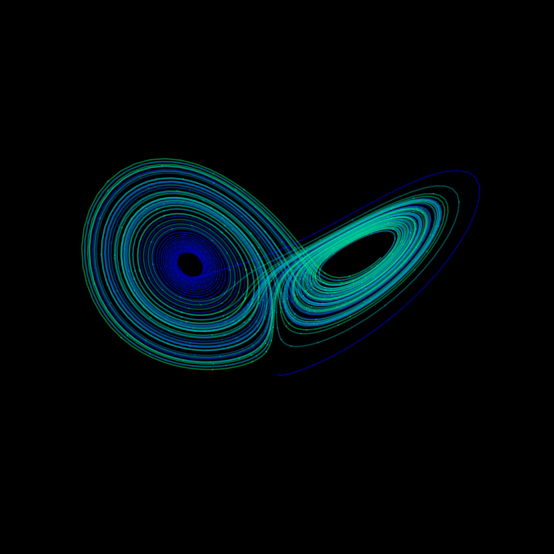

In [57]:
T=10000
tsParams={'dt':0.01}
X = getLorenz63(T,  tsParams)
plot3D(X)


/tmp/ipykernel_1599/3357825320.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


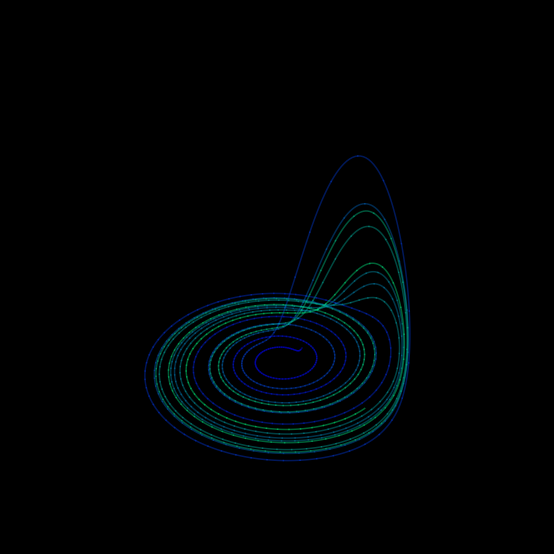

In [58]:
T=10000
tsParams={'dt':0.01}
X = getRossler(T,  tsParams)
plot3D(X)
